In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint

import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import MolFromSmiles as MolFromSmiles
from rdkit.Chem.AllChem import EmbedMolecule, MMFFOptimizeMolecule


from mordred import Calculator, descriptors
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250


RDKit WARNING: [01:40:51] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ls

Alpha_Keto_Output.csv              RT_model/
MenD_Classifier.ipynb              substrate_selection_mordred.ipynb
Product_LogP.ipynb


In [3]:
smiles_file = pd.read_csv('alpha_keto_smiles.csv')
smiles = []
for s in smiles_file['#smiles zinc_id']:
    smiles.append(s[:-17])

FileNotFoundError: [Errno 2] File alpha_keto_smiles.csv does not exist: 'alpha_keto_smiles.csv'

In [ ]:
mol_list = []

from rdkit.Chem.rdchem import Mol
from rdkit.Chem import rdmolops
from rdkit.Chem import AddHs
count=0
for s in smiles:
    mol = MolFromSmiles(s)
    
    mol = AddHs(mol)
    
    #try:
    EmbedMolecule(mol)#, useRandomCoords=True)  # This calculates the 3D structure
    try:
        MMFFOptimizeMolecule(mol)  # This cleans up the 3D structure using a force field approach
    except:
        rdmolops.RemoveStereochemistry(mol)  # Structure calculations can fail if there are stereochemistry conflicts
        EmbedMolecule(mol, useRandomCoords=True)  # This calculates the 3D structure
        MMFFOptimizeMolecule(mol)  # This cleans up the 3D structure using a force field approach
    count+=1
    mol_list.append(mol)

In [5]:
calc = Calculator(descriptors, ignore_3D=False)

features_df = calc.pandas(mol_list, ipynb=True)

In [6]:
features_df.index = smiles
features_df.head()

ABC      ABCGG  nAcid  nBase  \
O=C(O)C(=O)Cc1ccc(O)cc1                  9.589507   8.788034      1      0   
O=C(O)C(=O)Cc1ccccc1                     8.773011   8.182021      1      0   
CNC(=O)C(=O)O                            4.530370   5.004088      1      0   
CN(C)C(=O)C(=O)O                         5.415816   5.894012      1      0   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  9.865306  10.528015      3      0   

                                           SpAbs_A   SpMax_A  SpDiam_A  \
O=C(O)C(=O)Cc1ccc(O)cc1                  15.688441  2.243107  4.486214   
O=C(O)C(=O)Cc1ccccc1                     14.565903  2.211610  4.423220   
CNC(=O)C(=O)O                             7.662988  2.052881  4.105762   
CN(C)C(=O)C(=O)O                          8.424292  2.135779  4.271558   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  15.096021  2.326846  4.653693   

                                            SpAD_A   SpMAD_A   LogEE_A  ...  \
O=C(O)C(=O)Cc1ccc(O)cc1                  15.688441  1.206803  3.450509  ...   
O=C(O)C(=O)Cc1ccccc1                     14.565903  1.213825  3.368107  ...   
CNC(=O)C(=O)O                             7.662988  1.094713  2.766317  ...   
CN(C)C(=O)C(=O)O                          8.424292  1.053037  2.911963  ...   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  15.096021  1.078287  3.488620  ...   

                                            SRW10     TSRW10          MW  \
O=C(O)C(=O)Cc1ccc(O)cc1                  9.034438  43.368100  180.042259   
O=C(O)C(=O)Cc1ccccc1                     8.857230  41.714016  164.047344   
CNC(=O)C(=O)O                            7.890957  32.688753  103.026943   
CN(C)C(=O)C(=O)O                         8.297793  35.071670  117.042593   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  9.255983  44.863850  206.006267   

                                               AMW  WPath  WPol  Zagreb1  \
O=C(O)C(=O)Cc1ccc(O)cc1                   8.573441    268    15     60.0   
O=C(O)C(=O)Cc1ccccc1                      8.202367    212    13     54.0   
CNC(=O)C(=O)O                             8.585579     46     6     26.0   
CN(C)C(=O)C(=O)O                          7.802840     65     8     32.0   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  10.300313    293    20     62.0   

                                         Zagreb2  mZagreb1  mZagreb2  
O=C(O)C(=O)Cc1ccc(O)cc1                     65.0  5.694444  2.944444  
O=C(O)C(=O)Cc1ccccc1                        58.0  4.833333  2.777778  
CNC(=O)C(=O)O                               26.0  4.472222  1.777778  
CN(C)C(=O)C(=O)O                            33.0  5.333333  1.888889  
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O     69.0  8.666667  3.222222  

[5 rows x 1826 columns]

In [7]:
# Mordred leaves error messages in cells in df where value could not be calculated
# Replace all cells with error messages (strings) with np.nan using pd.to_numeric
features_df = features_df.apply(pd.to_numeric, errors='coerce')

features_df.to_csv('processed_data.csv')

features_df.head()

ABC      ABCGG  nAcid  nBase  \
O=C(O)C(=O)Cc1ccc(O)cc1                  9.589507   8.788034      1      0   
O=C(O)C(=O)Cc1ccccc1                     8.773011   8.182021      1      0   
CNC(=O)C(=O)O                            4.530370   5.004088      1      0   
CN(C)C(=O)C(=O)O                         5.415816   5.894012      1      0   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  9.865306  10.528015      3      0   

                                           SpAbs_A   SpMax_A  SpDiam_A  \
O=C(O)C(=O)Cc1ccc(O)cc1                  15.688441  2.243107  4.486214   
O=C(O)C(=O)Cc1ccccc1                     14.565903  2.211610  4.423220   
CNC(=O)C(=O)O                             7.662988  2.052881  4.105762   
CN(C)C(=O)C(=O)O                          8.424292  2.135779  4.271558   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  15.096021  2.326846  4.653693   

                                            SpAD_A   SpMAD_A   LogEE_A  ...  \
O=C(O)C(=O)Cc1ccc(O)cc1                  15.688441  1.206803  3.450509  ...   
O=C(O)C(=O)Cc1ccccc1                     14.565903  1.213825  3.368107  ...   
CNC(=O)C(=O)O                             7.662988  1.094713  2.766317  ...   
CN(C)C(=O)C(=O)O                          8.424292  1.053037  2.911963  ...   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  15.096021  1.078287  3.488620  ...   

                                            SRW10     TSRW10          MW  \
O=C(O)C(=O)Cc1ccc(O)cc1                  9.034438  43.368100  180.042259   
O=C(O)C(=O)Cc1ccccc1                     8.857230  41.714016  164.047344   
CNC(=O)C(=O)O                            7.890957  32.688753  103.026943   
CN(C)C(=O)C(=O)O                         8.297793  35.071670  117.042593   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  9.255983  44.863850  206.006267   

                                               AMW  WPath  WPol  Zagreb1  \
O=C(O)C(=O)Cc1ccc(O)cc1                   8.573441    268    15     60.0   
O=C(O)C(=O)Cc1ccccc1                      8.202367    212    13     54.0   
CNC(=O)C(=O)O                             8.585579     46     6     26.0   
CN(C)C(=O)C(=O)O                          7.802840     65     8     32.0   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O  10.300313    293    20     62.0   

                                         Zagreb2  mZagreb1  mZagreb2  
O=C(O)C(=O)Cc1ccc(O)cc1                     65.0  5.694444  2.944444  
O=C(O)C(=O)Cc1ccccc1                        58.0  4.833333  2.777778  
CNC(=O)C(=O)O                               26.0  4.472222  1.777778  
CN(C)C(=O)C(=O)O                            33.0  5.333333  1.888889  
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O     69.0  8.666667  3.222222  

[5 rows x 1826 columns]

In [8]:
features_df.describe()

ABC        ABCGG        nAcid        nBase      SpAbs_A  \
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000   
mean     13.181068    11.746697     1.094955     0.076162    21.428956   
std       4.851104     3.407610     0.322251     0.290332     7.971460   
min       3.047207     3.305183     1.000000     0.000000     5.226252   
25%       9.804496     9.441239     1.000000     0.000000    16.058516   
50%      11.796056    10.860459     1.000000     0.000000    19.119793   
75%      15.537214    13.883958     1.000000     0.000000    25.359049   
max      29.003726    22.323315     3.000000     3.000000    46.596990   

           SpMax_A     SpDiam_A       SpAD_A      SpMAD_A      LogEE_A  ...  \
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000  ...   
mean      2.352402     4.673015    21.428956     1.209539     3.707459  ...   
std       0.119874     0.221458     7.971460     0.062147     0.344844  ...   
min       1.847759     3.695518     5.226252     0.989886     2.408576  ...   
25%       2.284600     4.556827    16.058516     1.178504     3.478253  ...   
50%       2.352671     4.683693    19.119793     1.213439     3.658742  ...   
75%       2.415936     4.807684    25.359049     1.251446     3.924785  ...   
max       2.765315     5.449634    46.596990     1.333017     4.534879  ...   

             SRW10       TSRW10           MW          AMW        WPath  \
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000   
mean      9.500046    53.701627   250.339983     8.821546   749.557864   
std       0.571819    11.340495    81.055436     1.666284   791.595871   
min       6.834109    27.254130    74.000394     6.004051    18.000000   
25%       9.159573    45.126593   195.016772     7.709597   286.000000   
50%       9.516427    50.467003   228.099774     8.525797   427.000000   
75%       9.834350    61.600278   299.040639     9.580080   938.000000   
max      11.202793    87.943104   508.123028    20.563598  5176.000000   

              WPol      Zagreb1      Zagreb2     mZagreb1     mZagreb2  
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000  
mean     25.349159    86.255193    98.780415     7.394295     3.931469  
std      12.569716    34.615428    43.347128     1.969786     1.266832  
min       2.000000    16.000000    14.000000     3.361111     1.333333  
25%      17.000000    62.000000    70.000000     5.944444     3.111111  
50%      23.000000    78.000000    88.000000     7.027778     3.555556  
75%      30.000000   102.000000   118.000000     8.368056     4.611111  
max      81.000000   204.000000   267.000000    15.097222     8.333333  

[8 rows x 1824 columns]

In [9]:
nan_df = features_df.apply(np.isnan)

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(200, 15))

sns.heatmap(nan_df, ax=ax)


In [11]:
nan_cols = nan_df.columns[(nan_df > 0).any()]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(100, 50))

sns.heatmap(nan_df[nan_cols], ax=ax)

In [12]:
print('Number of columns before dropping NaN columns:', len(features_df.columns))
features_df = features_df.dropna(axis=1, how='all')
print('Number of columns after dropping NaN columns:', len(features_df.columns))

Number of columns before dropping NaN columns: 1826
Number of columns after dropping NaN columns: 1724


In [13]:
features_df = features_df.fillna(0)  # Replace all np.nan values with 0

In [14]:
new_nan_df = features_df.apply(np.isnan)
assert not new_nan_df.isnull().sum().any()  # Make sure we have no np.nan values in our dataframe

In [15]:
features_df

ABC      ABCGG  \
O=C(O)C(=O)Cc1ccc(O)cc1                              9.589507   8.788034   
O=C(O)C(=O)Cc1ccccc1                                 8.773011   8.182021   
CNC(=O)C(=O)O                                        4.530370   5.004088   
CN(C)C(=O)C(=O)O                                     5.415816   5.894012   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O              9.865306  10.528015   
...                                                       ...        ...   
CC1(C)O[C@@H]2C[C@@H]3[C@H]4CCC5=CC(=O)C=C[C@]5...  26.157380  21.343493   
CN(C)N/C=N/CCCC(=O)C(=O)O                            9.698897   9.085280   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  26.933436  22.180739   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  26.933436  22.180739   
Cn1c2cc(C(=O)C(=O)O)[nH]c2c(=O)n(C)c1=O             13.877237  12.772485   

                                                    nAcid  nBase    SpAbs_A  \
O=C(O)C(=O)Cc1ccc(O)cc1                                 1      0  15.688441   
O=C(O)C(=O)Cc1ccccc1                                    1      0  14.565903   
CNC(=O)C(=O)O                                           1      0   7.662988   
CN(C)C(=O)C(=O)O                                        1      0   8.424292   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O                 3      0  15.096021   
...                                                   ...    ...        ...   
CC1(C)O[C@@H]2C[C@@H]3[C@H]4CCC5=CC(=O)C=C[C@]5...      1      0  39.738726   
CN(C)N/C=N/CCCC(=O)C(=O)O                               1      2  15.971055   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...      1      0  40.965924   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...      1      0  40.965924   
Cn1c2cc(C(=O)C(=O)O)[nH]c2c(=O)n(C)c1=O                 1      0  22.280054   

                                                     SpMax_A  SpDiam_A  \
O=C(O)C(=O)Cc1ccc(O)cc1                             2.243107  4.486214   
O=C(O)C(=O)Cc1ccccc1                                2.211610  4.423220   
CNC(=O)C(=O)O                                       2.052881  4.105762   
CN(C)C(=O)C(=O)O                                    2.135779  4.271558   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O             2.326846  4.653693   
...                                                      ...       ...   
CC1(C)O[C@@H]2C[C@@H]3[C@H]4CCC5=CC(=O)C=C[C@]5...  2.761160  5.434230   
CN(C)N/C=N/CCCC(=O)C(=O)O                           2.094848  4.189696   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  2.765315  5.449634   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  2.765315  5.449634   
Cn1c2cc(C(=O)C(=O)O)[nH]c2c(=O)n(C)c1=O             2.513960  4.928174   

                                                       SpAD_A   SpMAD_A  \
O=C(O)C(=O)Cc1ccc(O)cc1                             15.688441  1.206803   
O=C(O)C(=O)Cc1ccccc1                                14.565903  1.213825   
CNC(=O)C(=O)O                                        7.662988  1.094713   
CN(C)C(=O)C(=O)O                                     8.424292  1.053037   
O=C(O)C(=O)[C@H](C(=O)O)[C@@H](O)C(=O)O             15.096021  1.078287   
...                                                       ...       ...   
CC1(C)O[C@@H]2C[C@@H]3[C@H]4CCC5=CC(=O)C=C[C@]5...  39.738726  1.241835   
CN(C)N/C=N/CCCC(=O)C(=O)O                           15.971055  1.140790   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  40.965924  1.241392   
CC1(C)O[C@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=...  40.965924  1.241392   
Cn1c2cc(C(=O)C(=O)O)[nH]c2c(=O)n(C)c1=O             22.280054  1.237781   

                                                     LogEE_A  ...      SRW10  \
O=C(O)C(=O)Cc1ccc(O)cc1                             3.450509  ...   9.034438   
O=C(O)C(=O)Cc1ccccc1                                3.368107  ...   8.857230   
CNC(=O)C(=O)O                                       2.766317  ...   7.890957   
CN(C)C(=O)C(=O)O                                    2.911963  ...   8.297793   
O=C(O)

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(features_df)
x

array([[-0.740726  , -0.8686814 , -0.29480882, ..., -0.77968566,
        -0.86338894, -0.77951372],
       [-0.90912082, -1.04661053, -0.29480882, ..., -0.94125264,
        -1.30076501, -0.91114057],
       [-1.78412594, -1.9796709 , -0.29480882, ..., -1.67984454,
        -1.48418077, -1.7009017 ],
       ...,
       [ 2.83629783,  3.06349774, -0.29480882, ...,  3.8826757 ,
         3.51389891,  2.09433927],
       [ 2.83629783,  3.06349774, -0.29480882, ...,  3.8826757 ,
         3.51389891,  2.09433927],
       [ 0.14357822,  0.30117736, -0.29480882, ...,  0.42052617,
         0.56161049, -0.03362821]])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
substrates = pd.read_csv('substrate_smiles.csv')
target = []
for s in smiles:
    target.append(s in substrates.values)
target = pd.DataFrame(target)

In [19]:
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf

principal component 1  principal component 2      0
0                -15.192242              -3.113753   True
1                -17.481230               0.449951   True
2                -42.543902               9.812663  False
3                -36.070921              16.841501  False
4                -20.780899              -4.744616  False
...                     ...                    ...    ...
1006              58.669560              24.683731  False
1007             -11.163289              15.675894  False
1008              62.065516              23.181953  False
1009              62.118518              21.290332  False
1010               0.948532              -6.265650  False

[1011 rows x 3 columns]

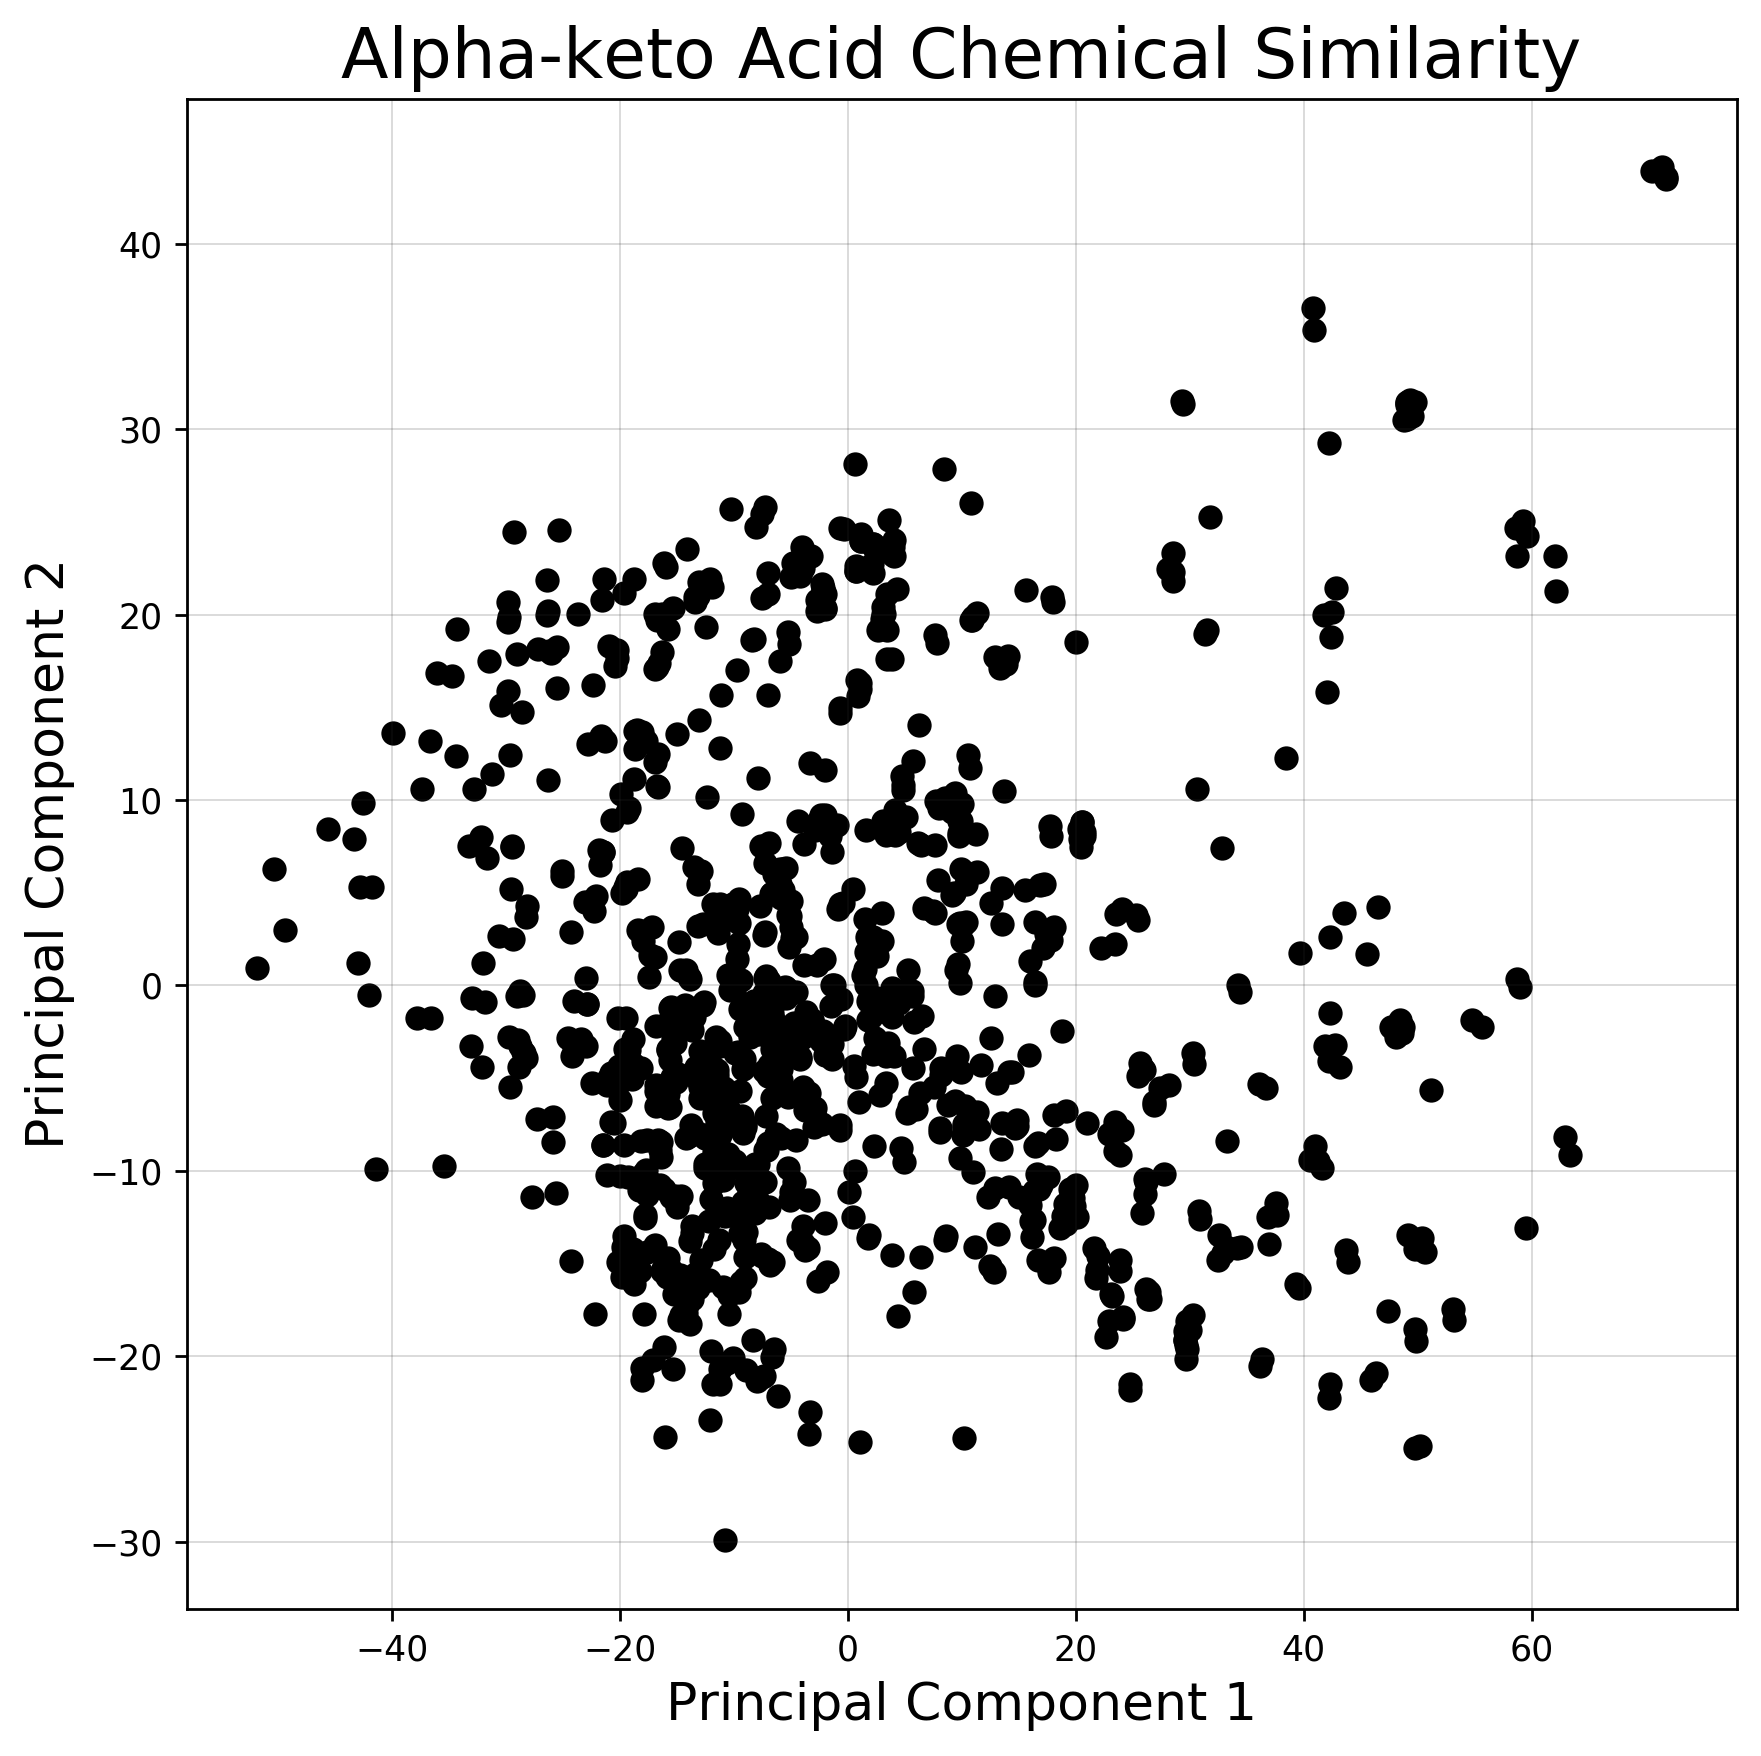

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Alpha-keto Acid Chemical Similarity', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c='k')
ax.grid(linestyle='-', linewidth='0.1', color='0.2')

In [75]:
labels = [True,False]
colors = ['r', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf[0] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)